In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle (2).json


In [ ]:
import os
import pandas as pd 
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!kaggle datasets download -d srthk5/facerecognition 

facerecognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
!unzip "*.zip" 

Archive:  facerecognition.zip
  inflating: me/1.jpg                
  inflating: me/10.jpg               
  inflating: me/1000.jpg             
  inflating: me/1001.jpg             
  inflating: me/1002.jpg             
  inflating: me/1003.jpg             
  inflating: me/1004.jpg             
  inflating: me/1005.jpg             
  inflating: me/1006.jpg             
  inflating: me/1008.jpg             
  inflating: me/101.jpg              
  inflating: me/1010.jpg             
  inflating: me/1011.jpg             
  inflating: me/1012.jpg             
  inflating: me/1016.jpg             
  inflating: me/1017.jpg             
  inflating: me/1018.jpg             
  inflating: me/1019.jpg             
  inflating: me/1020.jpg             
  inflating: me/1022.jpg             
  inflating: me/1023.jpg             
  inflating: me/1024.jpg             
  inflating: me/1025.jpg             
  inflating: me/1027.jpg             
  inflating: me/1029.jpg             
  inflating: me/1030

In [ ]:
bs=64 

In [ ]:
!mkdir face_img

mkdir: cannot create directory ‘face_img’: File exists


In [ ]:
!mv me face_img

mv: cannot move 'me' to 'face_img/me': Directory not empty


In [ ]:
!mv notme face_img

mv: cannot move 'notme' to 'face_img/notme': Directory not empty


In [ ]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("face_img"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms()) 

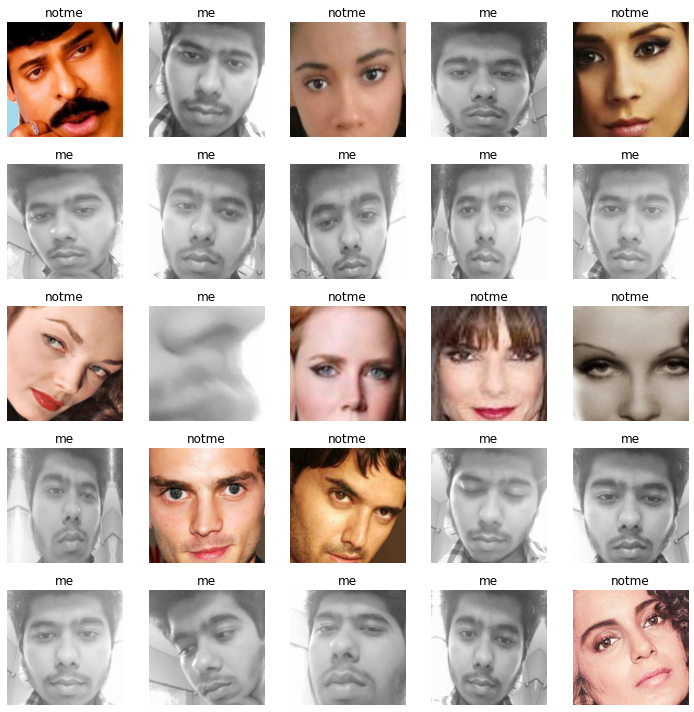

In [ ]:
data.show_batch(rows=5, figsize=(10,10)) 

In [ ]:
resnet_learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [ ]:
resnet_learn.fit_one_cycle(4) 

epoch,train_loss,valid_loss,error_rate,time
0,0.116996,0.095700,0.019074,13:16
1,0.052504,0.000258,0.000000,13:28
2,0.035750,0.000041,0.000000,13:27
3,0.021072,0.000103,0.000000,13:23


In [ ]:
path="/content/face_img/"
resnet_learn.save(path +"stage-1")
resnet_learn.export(path +"export.pkl")

In [ ]:
interp =ClassificationInterpretation.from_learner(resnet_learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs) 

True

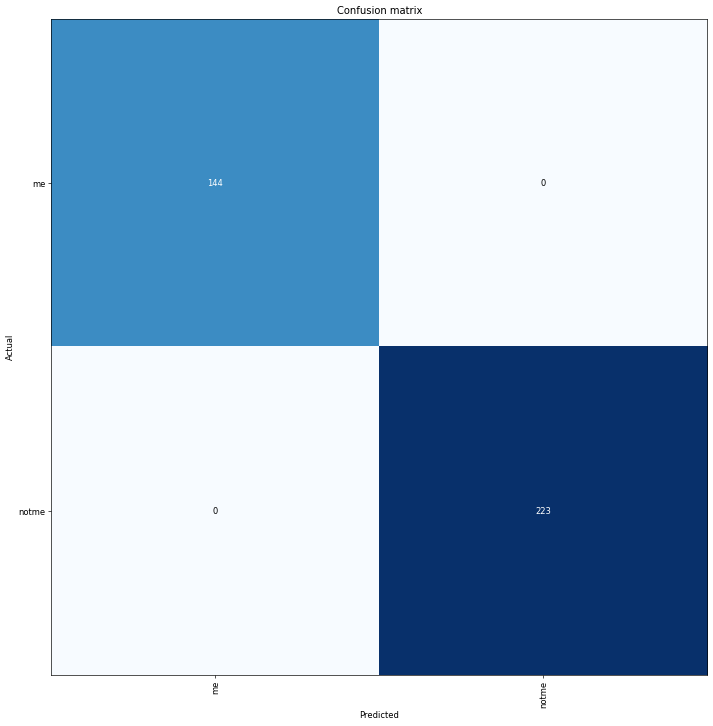

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60) 

In [ ]:
from kora.drive import upload_public
url = upload_public(path +"export.pkl")
url

ModuleNotFoundError: ignored

In [ ]:
os.makedirs('/content/drive/My Drive/face recognition',exist_ok=True)

In [ ]:
my_dir="/content/drive/My Drive/face recognition"

In [ ]:
resnet_learn .save(my_dir+"/Stage-1")

In [ ]:
resnet_learn .load(my_dir+"/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (1470 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
notme,notme,notme,notme,notme
Path: face_img;

Valid: LabelList (367 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
me,notme,notme,notme,me
Path: face_img;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (co

In [ ]:
resnet_learn .load("/content/drive/My Drive/face recognition/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (1470 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
notme,notme,notme,notme,notme
Path: face_img;

Valid: LabelList (367 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
me,notme,notme,notme,me
Path: face_img;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (co

In [ ]:
resnet_learn .export(my_dir+"/export.pkl")

In [ ]:
resnet_learn .load("/content/face_img/Stage-1.pth")

FileNotFoundError: ignored

In [ ]:
interp =ClassificationInterpretation.from_learner(resnet_learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs) 

True